In [1]:
import polygontorus_openmc as pt
import numpy as np
import matplotlib.pyplot as plt
import openmc

## Generation of base polygon
We will rotate this shape around the z-axis.

The points need to be in clockwise order. That's why we used numpy.flip()

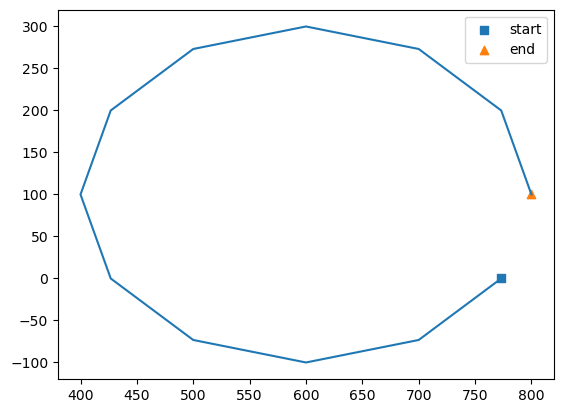

In [2]:
r0,z0 = (600,100)
R = 200
N = 12
rz_points = np.flip([[r0+R*np.cos(phi), z0+R*np.sin(phi)] for phi in np.linspace(0, 2*np.pi, N+1)[:-1]], axis=0)
plt.plot(rz_points[:,0], rz_points[:,1])
plt.scatter([rz_points[0,0]], [rz_points[0,1]], marker='s', label='start')
plt.scatter([rz_points[-1,0]], [rz_points[-1,1]], marker='^', label='end')
plt.legend()

## Generation of PolygonTorus objects

In [3]:
PT_1 = pt.PolygonTorus(rz_points=rz_points)
PT_2 = PT_1.Offset(10.0)
# OFFSETS CAN BE VERY SMALL
# CAUTION SHOULD BE USED WHEN MAKING LARGE NEGATIVE OFFSETS
# ==> THIS WILL LEAD TO VERTEX REMOVAL, BUT SHOULD STILL WORK

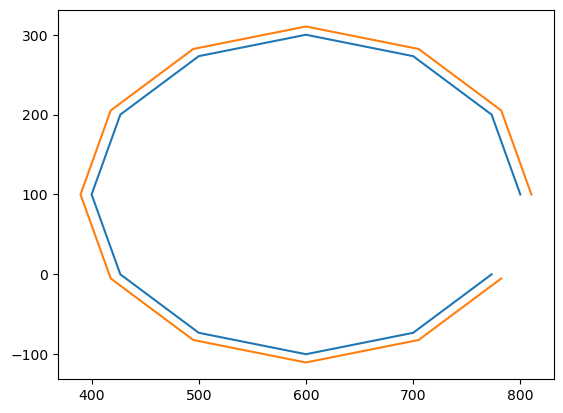

In [4]:
fig, ax = plt.subplots()
PT_1.polygon.PlotPolygon(mpl_axes=ax)
PT_2.polygon.PlotPolygon(mpl_axes=ax)

## Generation of openmc regions and cells

In [5]:
plasma_region = PT_1.region_in
wall_region = PT_1.region_out & PT_2.region_in
outside_region = PT_2.region_out

In [6]:
plasma_cell = openmc.Cell(region=plasma_region)
wall_cell = openmc.Cell(region=wall_region)
outside_cell = openmc.Cell(region=outside_region)

<Axes: >

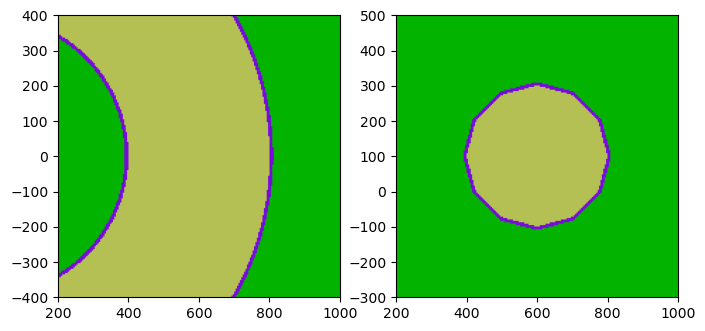

In [7]:
universe = openmc.Universe(cells=[plasma_cell, wall_cell, outside_cell])

fig, ax = plt.subplots(ncols=2, figsize=(8,4))

universe.plot(axes=ax[0], basis='xy', origin=(r0, 0, z0), width=(4*R, 4*R))
universe.plot(axes=ax[1], basis='xz', origin=(r0, 0, z0), width=(4*R, 4*R))